<a href="https://colab.research.google.com/github/aramakrishnan-006/pytorch-notebooks/blob/main/pytorch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import torchvision
import torchvision.transforms as transforms

In [5]:
train_dataset = torchvision.datasets.MNIST(root='.', train = True, transform = transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 205476535.52it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 115367327.45it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 73032561.00it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18567766.83it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [6]:
!ls

MNIST  sample_data


In [7]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [8]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [9]:
train_dataset.targets.shape

torch.Size([60000])

In [10]:
test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform = transforms.ToTensor(), download=True)

In [11]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [12]:
#Build the Model

model = nn.Sequential(nn.Linear(784, 128), nn.ReLU(), nn.Linear(128, 10))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
print(device)

cuda:0


In [14]:
#Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [15]:
#Data Loader

batch = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch, shuffle = False)

In [16]:
#What does the DataLoader do?
#Maps the data to (0,1) from (0,255)

temp_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 1, shuffle=True)

for x, y in temp_loader:
  print(x.shape)
  print(y.shape)
  print(x)
  break

torch.Size([1, 1, 28, 28])
torch.Size([1])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,


In [17]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [18]:
epochs = 10

train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

for i in range(epochs):
  train_loss = []
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    inputs = inputs.view(-1, 784)

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 784)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  train_losses[i] = train_loss
  test_losses[i] = test_loss

  print(f'Epoch: {i + 1}/{epochs} Train Loss: {train_loss:.4f} Test Loss: {test_loss: .4f}')

Epoch: 1/10 Train Loss: 0.4125 Test Loss:  0.2292
Epoch: 2/10 Train Loss: 0.1970 Test Loss:  0.1594
Epoch: 3/10 Train Loss: 0.1422 Test Loss:  0.1312
Epoch: 4/10 Train Loss: 0.1117 Test Loss:  0.1081
Epoch: 5/10 Train Loss: 0.0904 Test Loss:  0.0968
Epoch: 6/10 Train Loss: 0.0742 Test Loss:  0.0872
Epoch: 7/10 Train Loss: 0.0621 Test Loss:  0.0831
Epoch: 8/10 Train Loss: 0.0533 Test Loss:  0.0874
Epoch: 9/10 Train Loss: 0.0452 Test Loss:  0.0775
Epoch: 10/10 Train Loss: 0.0386 Test Loss:  0.0791


[]

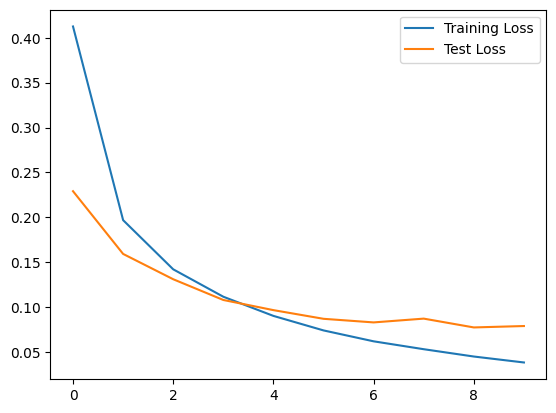

In [19]:
#Plot the losses

plt.plot(train_losses, label = 'Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.plot()

In [20]:
n_correct = 0.
n_total = 0.

for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)

  inputs = inputs.reshape(-1, 784)

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.

for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)

  inputs = inputs.reshape(-1, 784)

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f'Training Accuracy: {train_acc:.4f} Test Accuracy: {test_acc: .4f}')

Training Accuracy: 0.9916 Test Accuracy:  0.9759


In [21]:
#Drawing a Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix without Normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center', color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


Confusion Matrix without Normalization
[[ 972    0    0    2    1    0    2    1    2    0]
 [   0 1127    3    0    0    1    1    1    2    0]
 [   8    6  989    5    4    0    4   10    6    0]
 [   1    0    1  993    1    4    0    3    4    3]
 [   1    0    3    1  964    1    3    3    1    5]
 [   2    2    0    6    0  871    4    2    4    1]
 [   6    3    0    1    1    5  939    0    3    0]
 [   1    5    7    3    0    0    0 1006    4    2]
 [   5    2    2   13    3    4    2    5  934    4]
 [   3    5    0    9   13    3    1    6    5  964]]


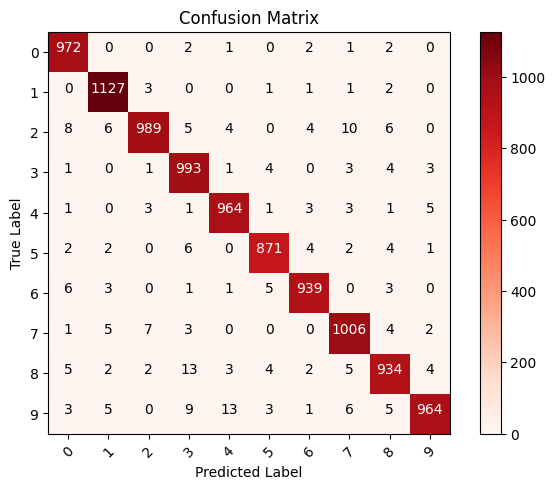

In [23]:
#Getting the predictions into an array and plotting the matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

for inputs, targets in test_loader:
  inputs = inputs.to(device)
  inputs = inputs.view(-1, 784)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True Label: 5 Predicted: 3')

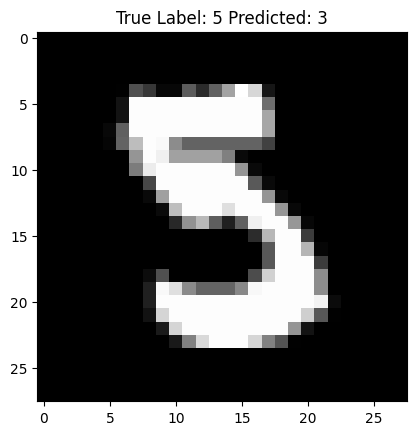

In [24]:
#Showing some misclassified images

misclassified_id = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_id)
plt.imshow(x_test[i], cmap='gray')
plt.title('True Label: %s Predicted: %s' % (y_test[i], int(p_test[i])))